In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

def get_html(url):  # 페이지에 소스코드를 요청하여 받는 함수로
    _html = ''      # 앞으로 변경하지 않고 사용하시면 됩니다.
    resp = requests.get(url)
    if resp.status_code == 200:
        _html = resp.text
    return _html

# Q1

In [2]:
# 아래와 같이 원하는 영역의 HTML 문법 규칙 입력
name_list=[]
code_list=[]
price_list=[]
for p in range(1,25):
    # Loop문의 index를 String형태로 변환하여 URL 주소를 생성
    URL = 'https://finance.naver.com/sise/entryJongmok.nhn?&page='+str(p)
    
    html = get_html(URL)
    soup = BeautifulSoup(html, 'html.parser')
#     print(soup)
#     break
    # HTML 규칙 적용
    Code_text = soup('td',{'class' : "ctg"},)
    for i,ii in enumerate(Code_text):
        Str_code = str(ii)
        code_list.append(Str_code.split('code=')[1].split('"')[0])
        name_list.append(Str_code.split('"_parent">')[1].split('</a>')[0])

    Code_text2 = soup('td',{'class': "number_2"},)
    for i in range(len(Code_text)):
        price_list.append(str(Code_text2[i*4]).split('number_2">')[1].split('</td>')[0])
                                                        
for i in range(len(name_list)):
    print(i, code_list[i], name_list[i],price_list[i])

0 005930 삼성전자 42,900
1 000660 SK하이닉스 74,400
2 005380 현대차 130,000
3 068270 셀트리온 201,500
4 051910 LG화학 344,000
5 012330 현대모비스 219,000
6 055550 신한지주 44,900
7 017670 SK텔레콤 262,500
8 005490 POSCO 241,000
9 051900 LG생활건강 1,323,000
10 035420 NAVER 122,500
11 207940 삼성바이오로직스 298,000
12 105560 KB금융 46,350
13 028260 삼성물산 98,900
14 015760 한국전력 27,300
15 034730 SK 248,500
16 000270 기아차 42,350
17 032830 삼성생명 81,000
18 018260 삼성에스디에스 205,500
19 096770 SK이노베이션 170,500
20 006400 삼성SDI 221,500
21 033780 KT&amp;G; 101,000
22 000810 삼성화재 292,500
23 003550 LG 72,000
24 090430 아모레퍼시픽 203,500
25 066570 LG전자 72,400
26 251270 넷마블 131,000
27 036570 엔씨소프트 502,000
28 086790 하나금융지주 36,300
29 035720 카카오 130,000
30 010950 S-Oil 85,900
31 316140 우리금융지주 13,800
32 011170 롯데케미칼 264,500
33 009540 현대중공업 115,500
34 010130 고려아연 433,000
35 024110 기업은행 14,000
36 009150 삼성전기 99,300
37 030200 KT 28,150
38 035250 강원랜드 32,350
39 032640 LG유플러스 15,800
40 034220 LG디스플레이 17,850
41 018880 한온시스템 11,550
42 002790 아모레G 73,400
43 021240 

# Q2

['46250', '46850', '47050', '47250', '47050', '45600', '45300', '45350', '45200', '44750', '44650', '44850', '46150', '45850', '45900', '45300', '44850', '44250', '42450', '42900']


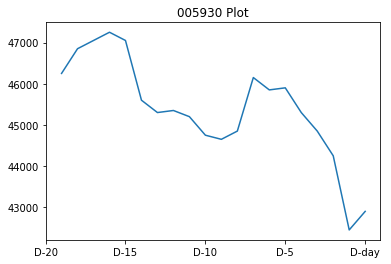

In [15]:
Samsung_list=[]
Samsung_int_list=[]

for p in range(1,3):
    #삼성전자의 종목코드 005930
    URL = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page='+str(p)

    html = get_html(URL)
    soup = BeautifulSoup(html, 'html.parser')

    Code_text = soup('td',{'class' : "num"},)
    for i in range(10):
        Samsung_list.append(str(Code_text[i*6]).split('tah p11">')[1].split('</span>')[0].replace(',',''))
        Samsung_int_list.append(int(str(Code_text[i*6]).split('tah p11">')[1].split('</span>')[0].replace(',','')))
plt.title('005930 Plot')
plt.plot(range(1,21),Samsung_int_list[::-1])
plt.xticks([0,5,10,15,20],['D-20','D-15','D-10','D-5','D-day'])
print (Samsung_list[::-1])